In [1]:
# Performing Inference on a Single Image
import torch
from doctr.models import ocr_predictor, crnn_vgg16_bn, db_resnet50
from doctr.io import DocumentFile
from doctr.datasets import VOCABS

# Initialize the OCR model with specified architectures

# Device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Initialize text detection model
det_model = db_resnet50(pretrained=False, pretrained_backbone=False)
det_params = torch.load('/home/jupyter/mcdonalds-workers/BrainHack-TIL25/ocr/src/text_detection.pt', map_location=device)
det_model.load_state_dict(det_params)


# Initialize the text recognition model
reco_model = crnn_vgg16_bn(pretrained=False, pretrained_backbone=False,vocab=VOCABS["english"])
reco_params = torch.load('/home/jupyter/mcdonalds-workers/BrainHack-TIL25/ocr/src/text_recognition.pt', map_location=device)
reco_model.load_state_dict(reco_params)

# Initialize OCR model
model = ocr_predictor(det_arch=det_model, reco_arch=reco_model, pretrained=False).cuda().half()

/opt/conda/envs/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Analysis indicates potential BH-2000 hideouts may be located in remote areas identi-
fied. as. high-risk zones. based on current geospatial data. CYPHER's advanced algorithms
have pinpointed several areas with. elevated probability off BH-2000 activity, requiring
immediate surveillance and reconnaissance efforts. Operational units are advised to
exercise extreme. caution and deploy specialized drones equipped with infrared scanning
capabilities to detect any hidden structures on. underground bunkers where BH-2000 op-
eratives might be concealing thein. presence. Real-time satellite imagery is to be uti-
lized fon continuous monitoring of the target areas to avoid ambush and ensure the
safety of our reconnaissance teams.
iIntelligence gathered from intercepted communications suggests the BH-2000 may be us- -
ing encrypted channels to coordinate their operations and evade detection by conven.
tional meanst CYPHER's decryption protocots are currently being deployed to neutralize
the. BH-2

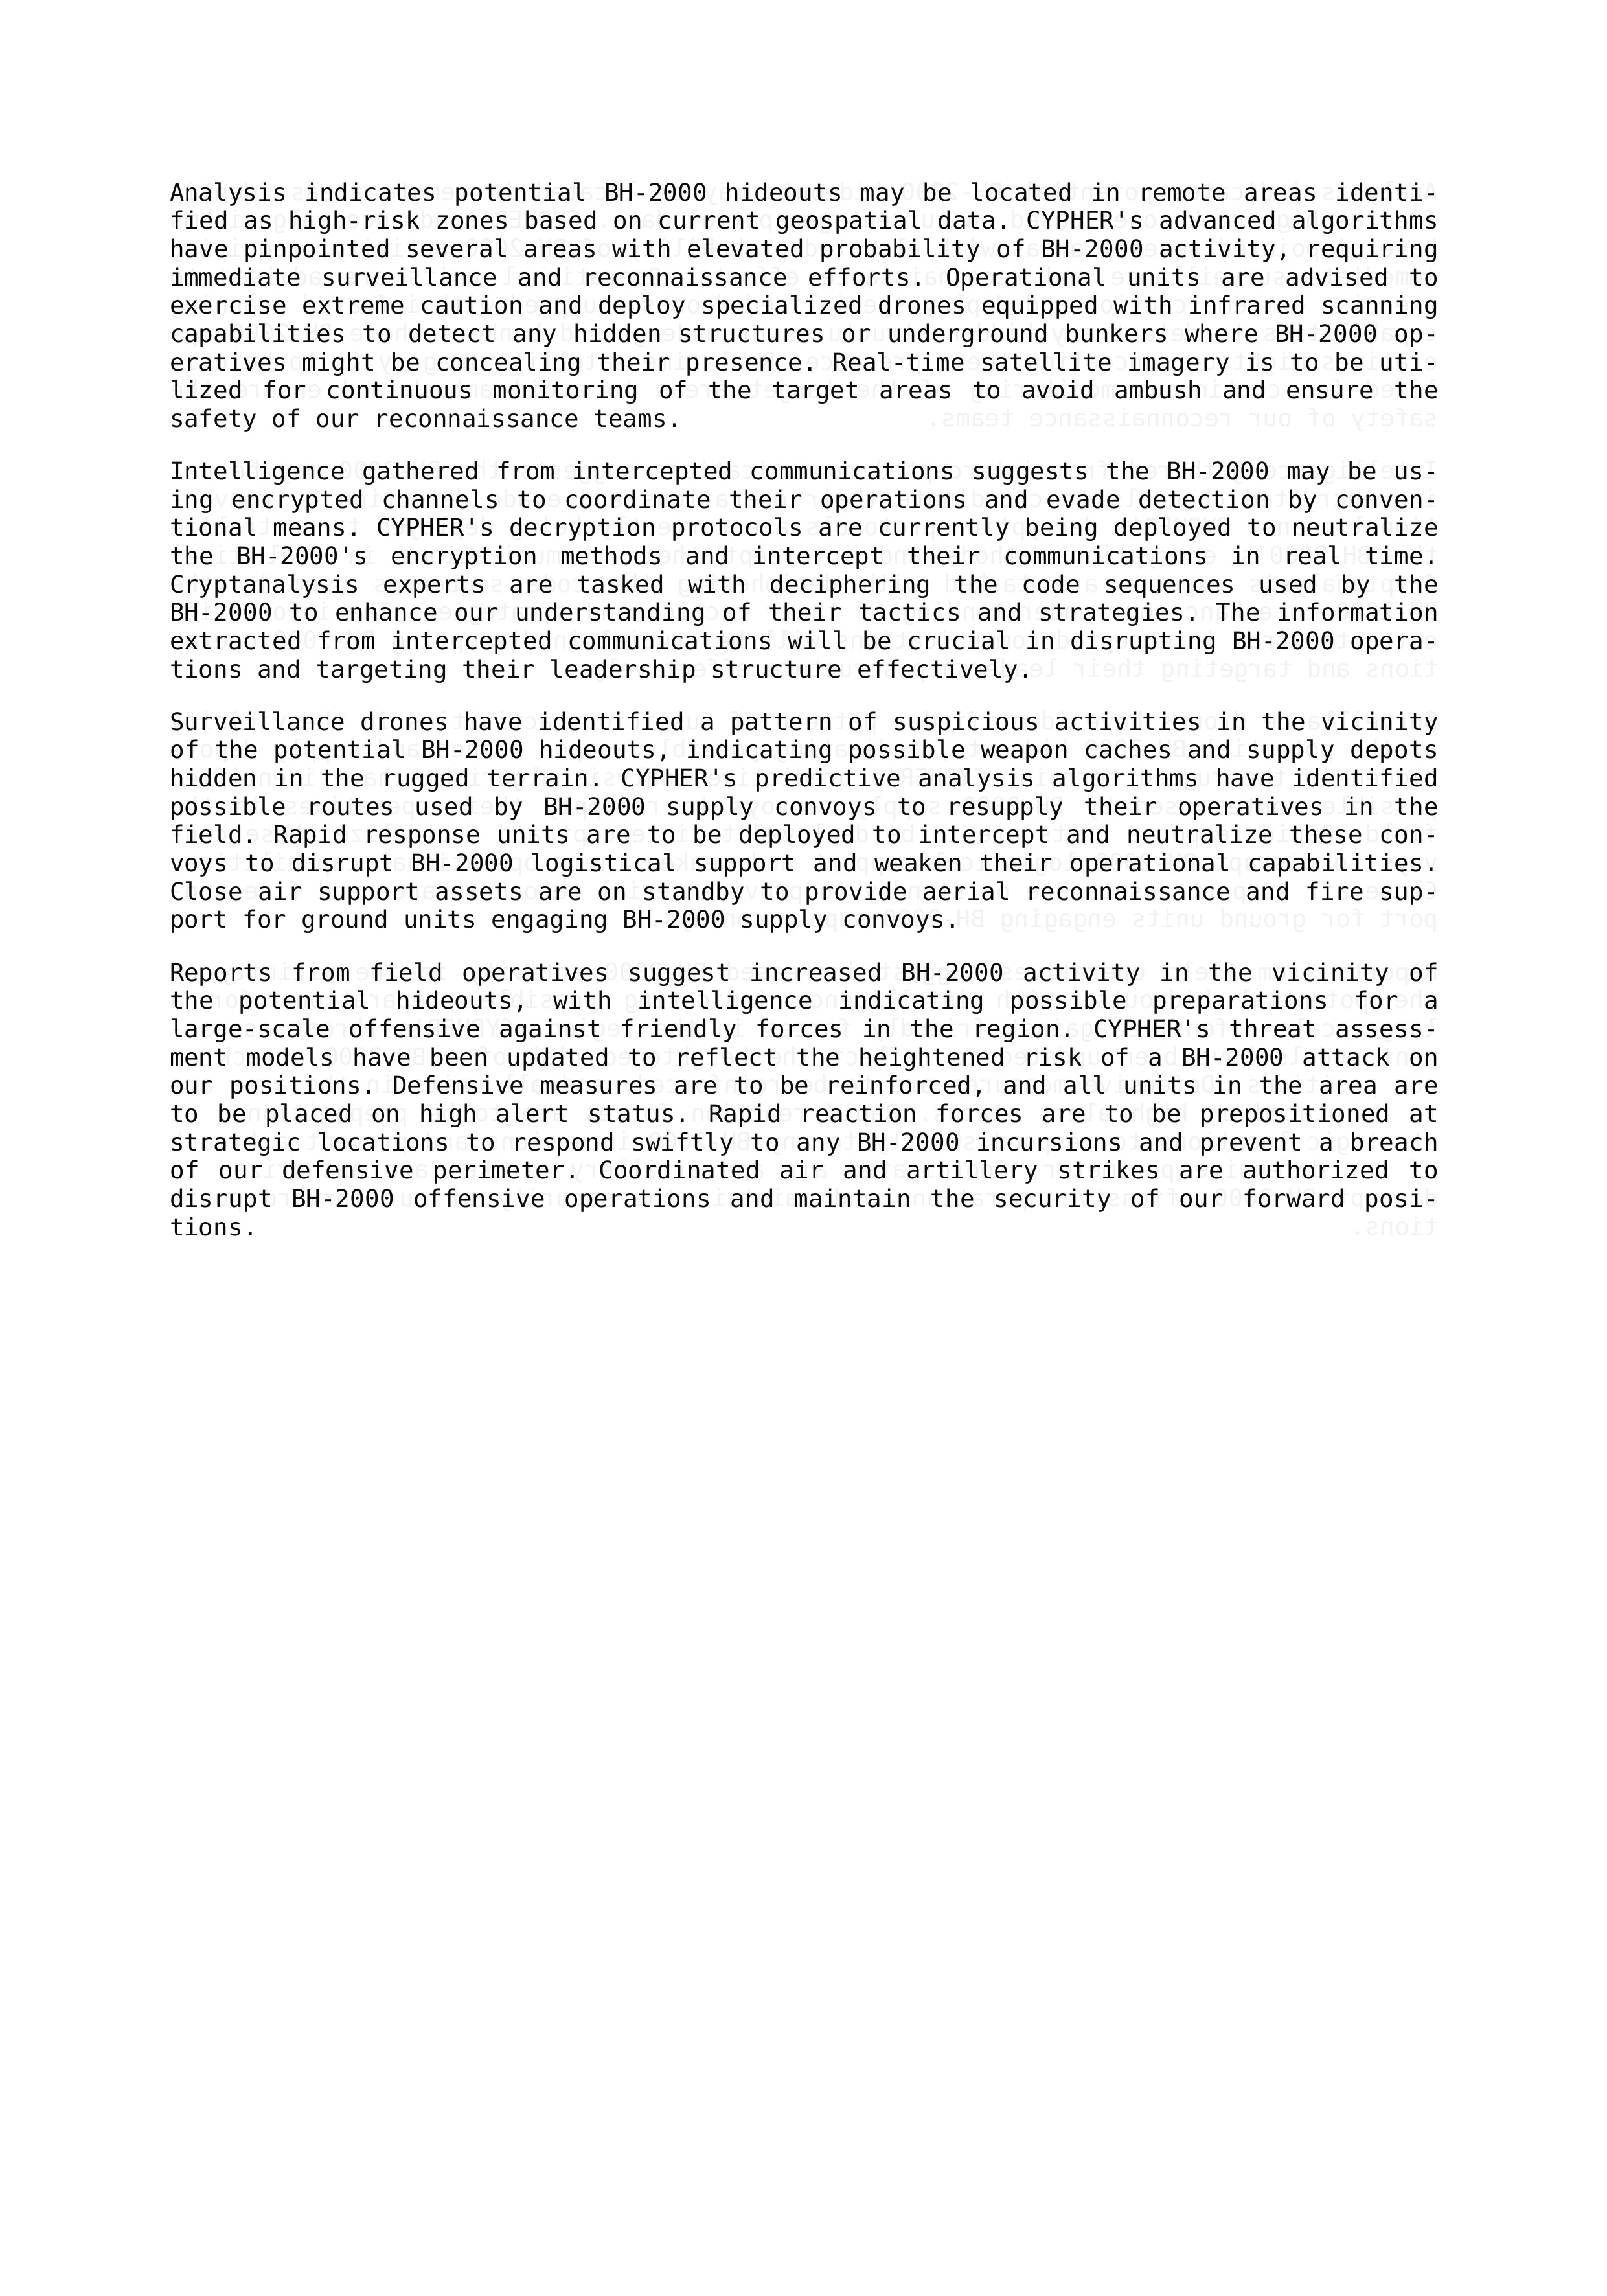

In [2]:
from PIL import Image
import jiwer
# For a single image inference
# Paths
text_path = "/home/jupyter/novice/ocr/sample_2_text.txt"
image_path = "/home/jupyter/novice/ocr/sample_2.jpg"  # Replace with your image path

image = Image.open(image_path).convert("RGB")
doc = DocumentFile.from_images(image_path)

# Perform OCR
result = model(doc)

# Extract text from results
text = result.render()
print(text)

# Compare with Ground Truth
with open(text_path, 'r', encoding='utf-8') as f:
    content = f.read()
print("\nGround Truth:")
print(content)

# Evaluate CER 
cer = jiwer.cer(text, content)
print(f"\nCER: {cer:.4f}")

# Print Image 
image